<a href="https://colab.research.google.com/github/aidanpeeples/ProgrammingChallenges/blob/master/Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [114]:

df = pd.read_csv("TD_HOSPITAL_TRAIN.csv").drop(["income","totalcost", "extraprimary", "race", "disability", "cost", "primary"], axis=1)
df.head()

,timeknown,reflex,sex,blood,bloodchem1,bloodchem2,temperature,heart,psych1,glucose,...,administratorcost,urine,diabetes,bloodchem6,education,psych5,psych6,information,cancer,death
0,4.0,11.228005,male,20.699219,2.199707,1.299805,35.59375,103.0,4.0,157.0,...,3525.0,5360.0,0.0,167.5000,20.0,30.0,2.000,0.0,no,1.0
1,467.0,9.714861,M,9.398438,NaN,0.699951,39.00000,50.0,3.0,271.0,...,43200.0,2570.0,0.0,480.0000,16.0,11.5,1.000,10.0,metastatic,1.0
2,533.0,11.353296,Male,19.296875,NaN,1.599854,38.19531,50.0,3.0,117.0,...,5894.0,1690.0,1.0,177.1250,5.0,18.0,0.000,5.0,yes,0.0
3,68.0,9.269058,female,7.500000,2.500000,0.599976,37.59375,80.0,4.0,NaN,...,16717.0,NaN,0.0,NaN,12.0,7.0,1.839,12.0,no,1.0
4,1605.0,8.655387,female,15.099609,4.399414,0.699951,35.69531,114.0,4.0,NaN,...,10151.0,NaN,0.0,233.3125,2.0,7.0,6.000,12.0,no,0.0


In [115]:
df.replace('yes', 1, inplace=True)
df.replace('no', 0, inplace=True)

df.replace('male', 1, inplace=True)
df.replace('M', 1, inplace=True)
df.replace('Male', 1, inplace=True)
df.replace('Female', 0, inplace=True)
df.replace('F', 0, inplace=True)
df.replace('female', 0, inplace=True)

df.replace('dnr', 1, inplace=True)
df.replace('dnr before sadm', 1, inplace=True)
df.replace('dnr after sadm', 1, inplace=True)
df.replace('no dnr', 1, inplace=True)

df.replace('metastatic', 1, inplace=True)
df.replace('', 0, inplace=True)
df.fillna(0, inplace=True)

In [116]:
df.head()

,timeknown,reflex,sex,blood,bloodchem1,bloodchem2,temperature,heart,psych1,glucose,...,administratorcost,urine,diabetes,bloodchem6,education,psych5,psych6,information,cancer,death
0,4.0,11.228005,1,20.699219,2.199707,1.299805,35.59375,103.0,4.0,157.0,...,3525.0,5360.0,0.0,167.5000,20.0,30.0,2.000,0.0,0,1.0
1,467.0,9.714861,1,9.398438,0.000000,0.699951,39.00000,50.0,3.0,271.0,...,43200.0,2570.0,0.0,480.0000,16.0,11.5,1.000,10.0,1,1.0
2,533.0,11.353296,1,19.296875,0.000000,1.599854,38.19531,50.0,3.0,117.0,...,5894.0,1690.0,1.0,177.1250,5.0,18.0,0.000,5.0,1,0.0
3,68.0,9.269058,0,7.500000,2.500000,0.599976,37.59375,80.0,4.0,0.0,...,16717.0,0.0,0.0,0.0000,12.0,7.0,1.839,12.0,0,1.0
4,1605.0,8.655387,0,15.099609,4.399414,0.699951,35.69531,114.0,4.0,0.0,...,10151.0,0.0,0.0,233.3125,2.0,7.0,6.000,12.0,0,0.0


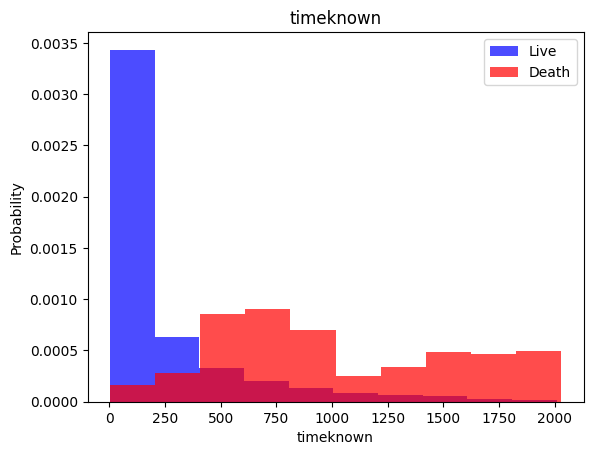

KeyError: ignored

In [117]:
for label in cols[:-1]:
  plt.hist(df[df["death"]==1][label], color='blue', label='Live', alpha=0.7, density=True)
  plt.hist(df[df["death"]==0][label], color='red', label='Death', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets

In [118]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [119]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [120]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [122]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [123]:
y_pred = knn_model.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.73      0.68       488
         1.0       0.85      0.77      0.81       924

    accuracy                           0.76      1412
   macro avg       0.74      0.75      0.74      1412
weighted avg       0.77      0.76      0.76      1412



# Naive Bayes

In [125]:
from sklearn.naive_bayes import GaussianNB

In [126]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [127]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72       488
         1.0       0.86      0.83      0.84       924

    accuracy                           0.80      1412
   macro avg       0.78      0.79      0.78      1412
weighted avg       0.80      0.80      0.80      1412



# Log Regression

Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [146]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [147]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8725212464589235


In [150]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [151]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
plt.figure(figsize=(12, 8))


In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [130]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       488
         1.0       0.91      0.88      0.89       924

    accuracy                           0.86      1412
   macro avg       0.85      0.85      0.85      1412
weighted avg       0.86      0.86      0.86      1412



# SVM

In [131]:
from sklearn.svm import SVC

In [132]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [133]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       488
         1.0       0.91      0.90      0.91       924

    accuracy                           0.88      1412
   macro avg       0.86      0.87      0.87      1412
weighted avg       0.88      0.88      0.88      1412



# Neural Net

In [134]:
import tensorflow as tf

In [135]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [139]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(36,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


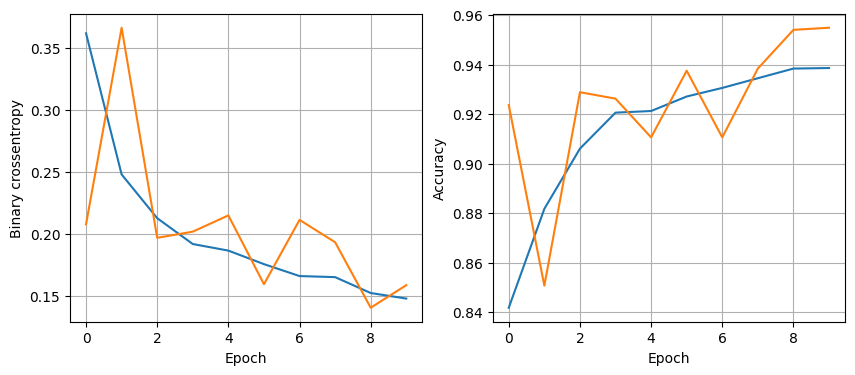

45/45 [==============================] - 0s 2ms/step - loss: 0.2747 - accuracy: 0.8959
16 nodes, dropout 0, lr 0.01, batch size 64


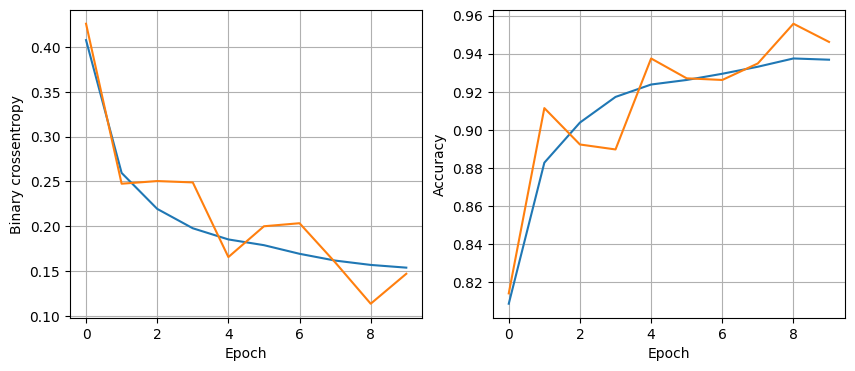

45/45 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8945
16 nodes, dropout 0, lr 0.01, batch size 128


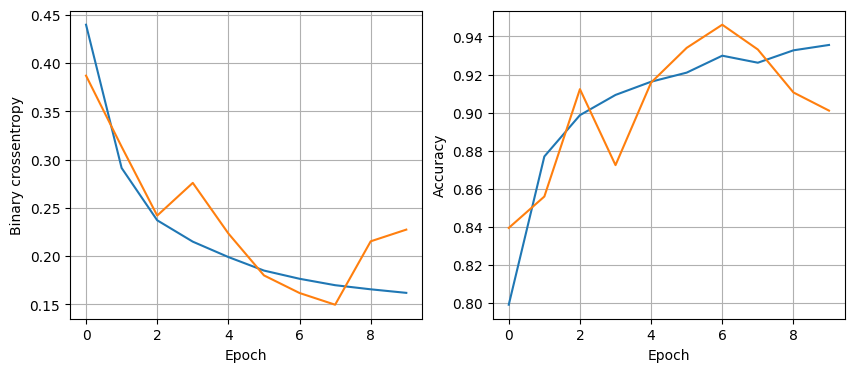

45/45 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.8924
16 nodes, dropout 0, lr 0.005, batch size 32


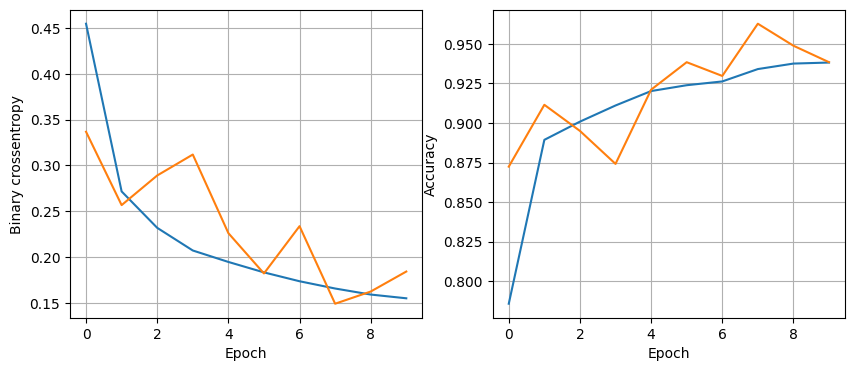

45/45 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.8895
16 nodes, dropout 0, lr 0.005, batch size 64


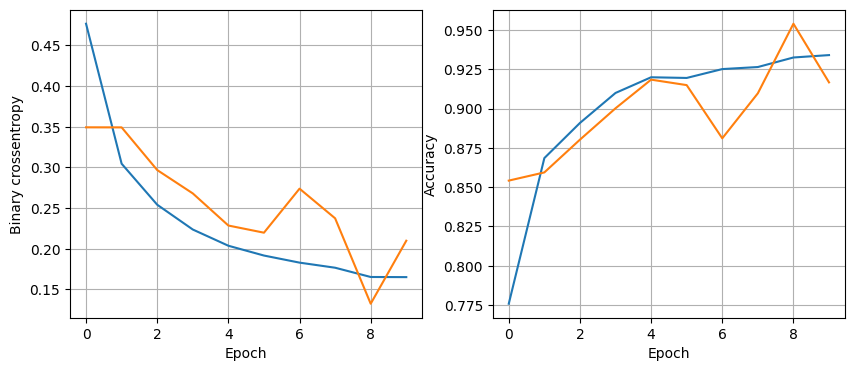

45/45 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.8916
16 nodes, dropout 0, lr 0.005, batch size 128


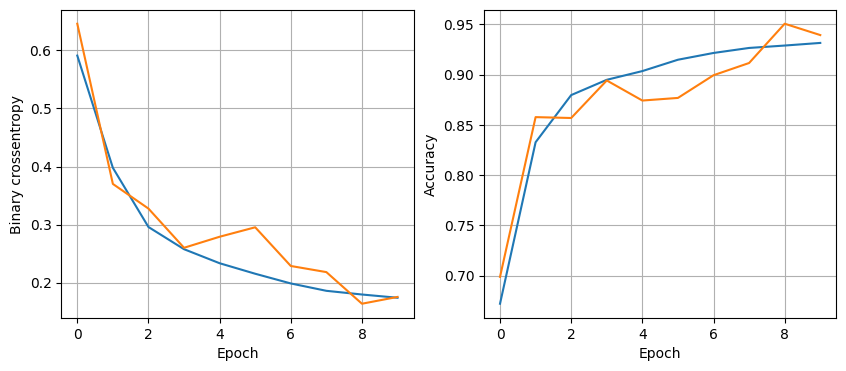

45/45 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.8902
16 nodes, dropout 0, lr 0.001, batch size 32


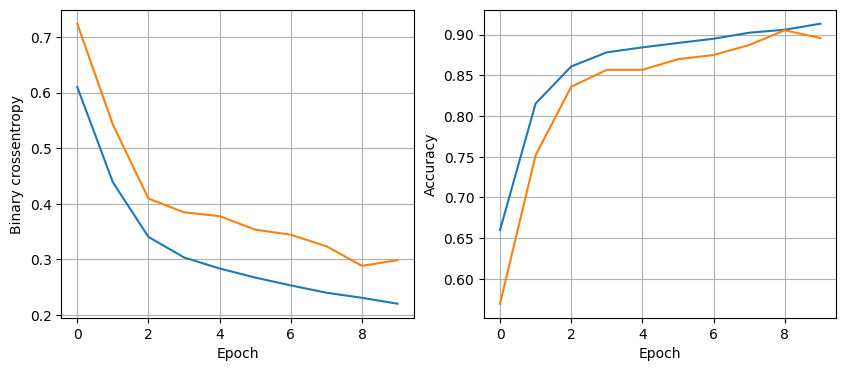

45/45 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.8831
16 nodes, dropout 0, lr 0.001, batch size 64


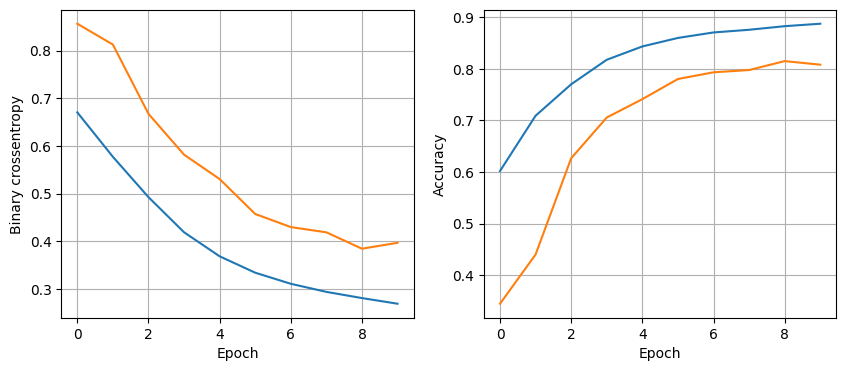

45/45 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8626
16 nodes, dropout 0, lr 0.001, batch size 128


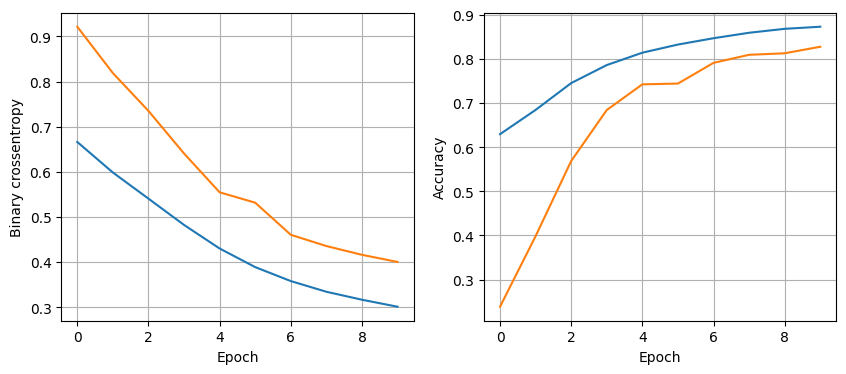

45/45 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8562
16 nodes, dropout 0.2, lr 0.01, batch size 32


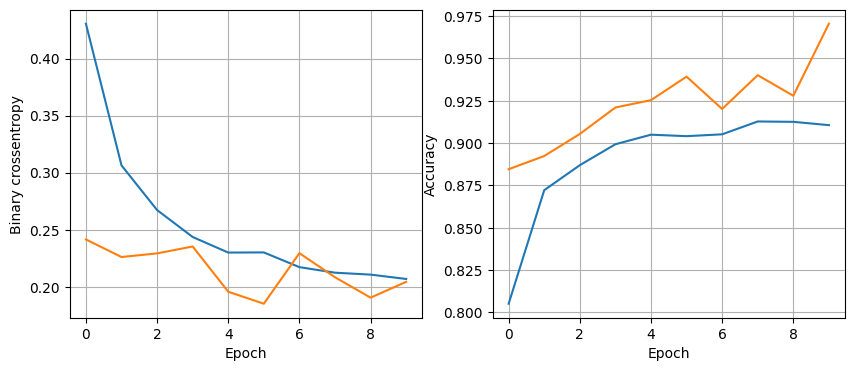

45/45 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.8959
16 nodes, dropout 0.2, lr 0.01, batch size 64


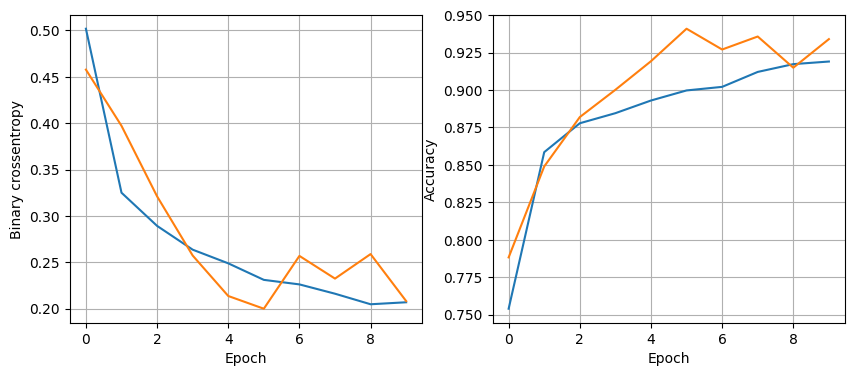

45/45 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.9008
16 nodes, dropout 0.2, lr 0.01, batch size 128


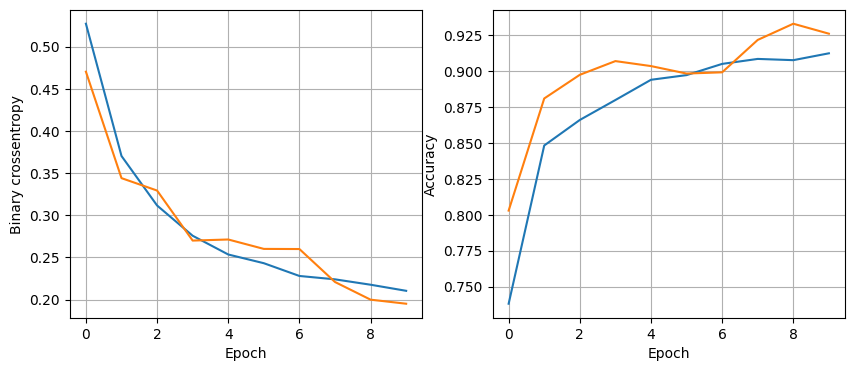

45/45 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.8987
16 nodes, dropout 0.2, lr 0.005, batch size 32


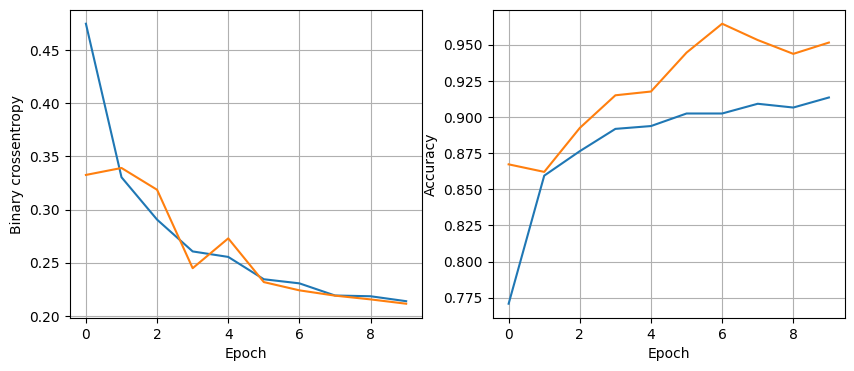

45/45 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.8966
16 nodes, dropout 0.2, lr 0.005, batch size 64


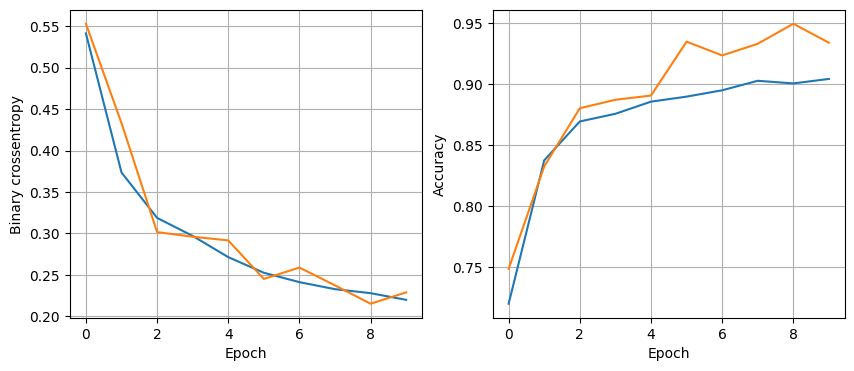

45/45 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.8994
16 nodes, dropout 0.2, lr 0.005, batch size 128


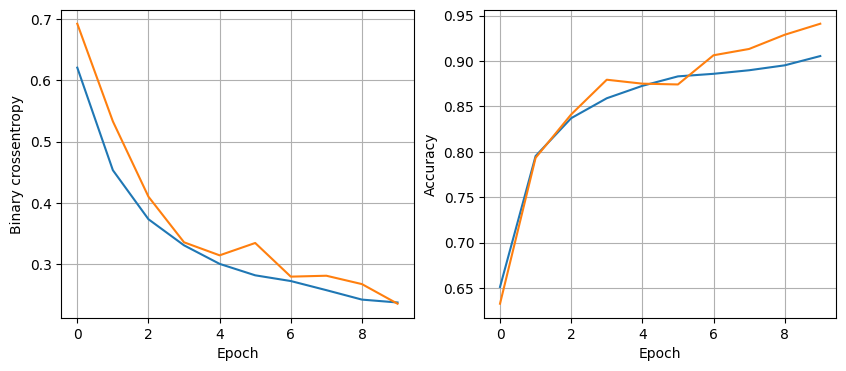

45/45 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.8959
16 nodes, dropout 0.2, lr 0.001, batch size 32


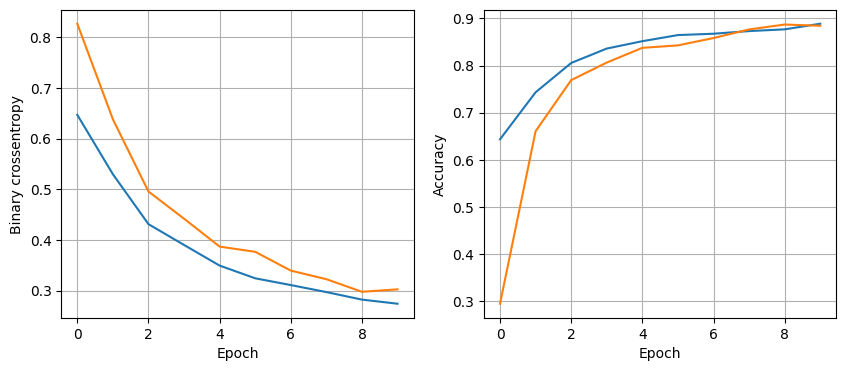

45/45 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8853
16 nodes, dropout 0.2, lr 0.001, batch size 64


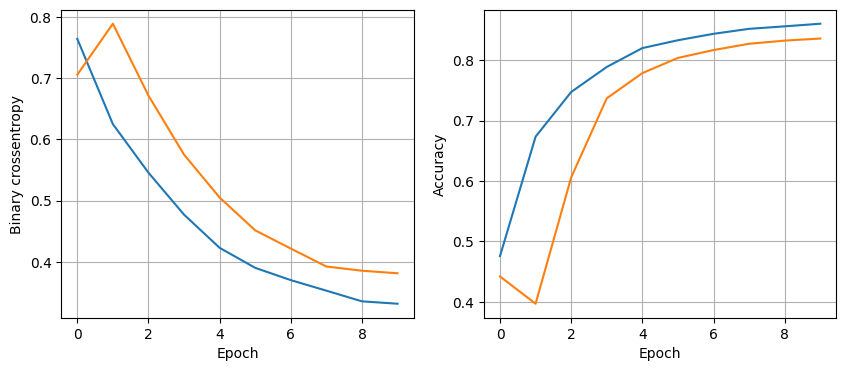

45/45 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8718
16 nodes, dropout 0.2, lr 0.001, batch size 128


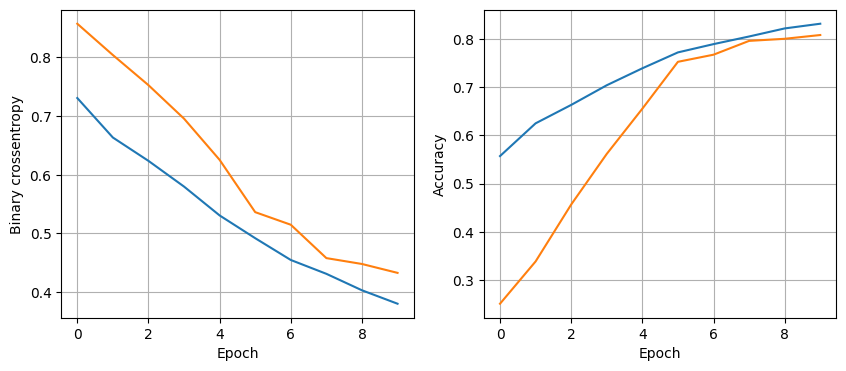

45/45 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8555
32 nodes, dropout 0, lr 0.01, batch size 32


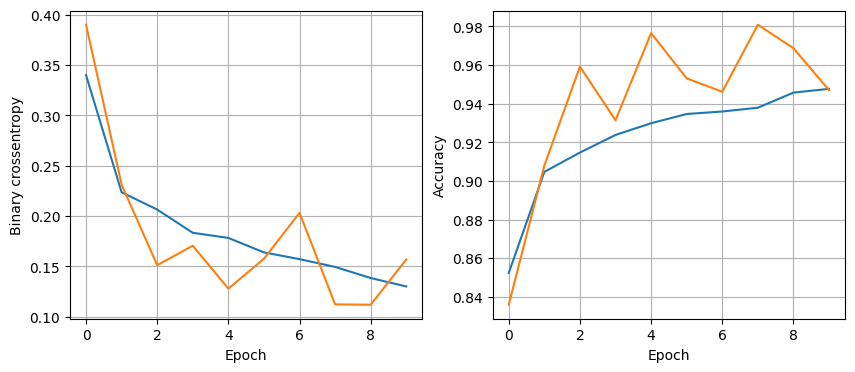

45/45 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8874
32 nodes, dropout 0, lr 0.01, batch size 64


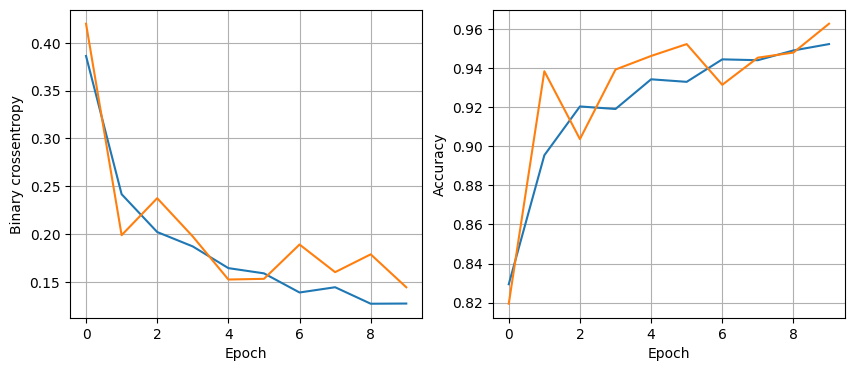

45/45 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8874
32 nodes, dropout 0, lr 0.01, batch size 128


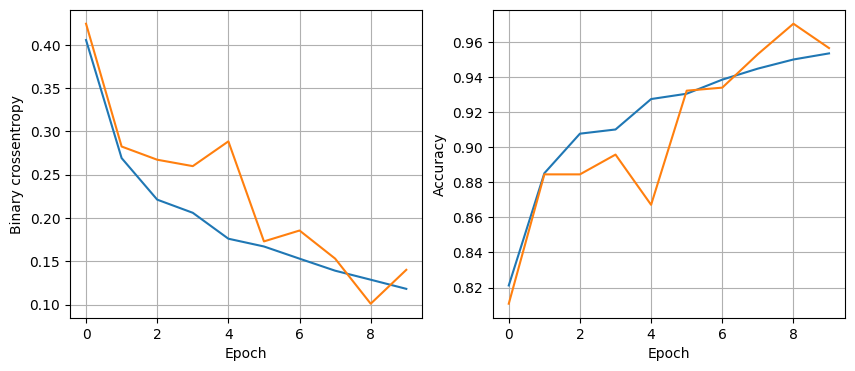

45/45 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8853
32 nodes, dropout 0, lr 0.005, batch size 32


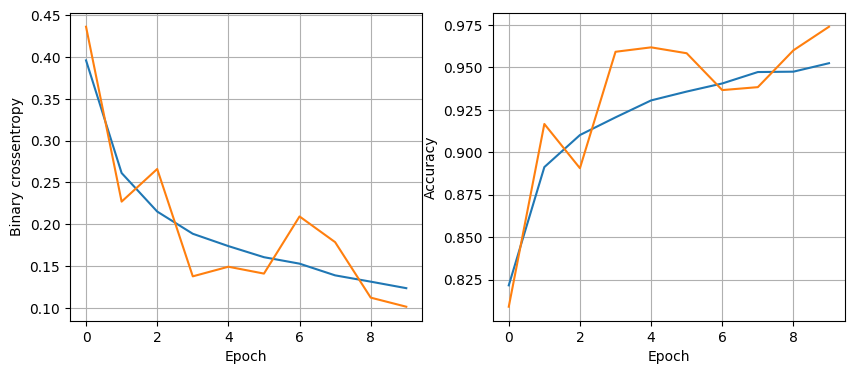

45/45 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8980
32 nodes, dropout 0, lr 0.005, batch size 64


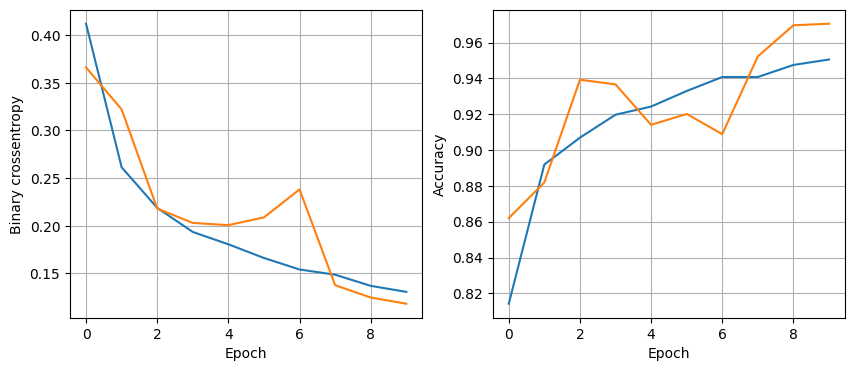

45/45 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.9044
32 nodes, dropout 0, lr 0.005, batch size 128


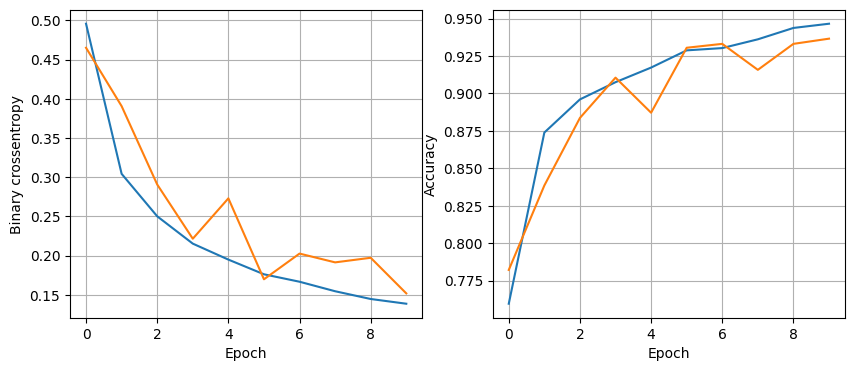

45/45 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.8902
32 nodes, dropout 0, lr 0.001, batch size 32


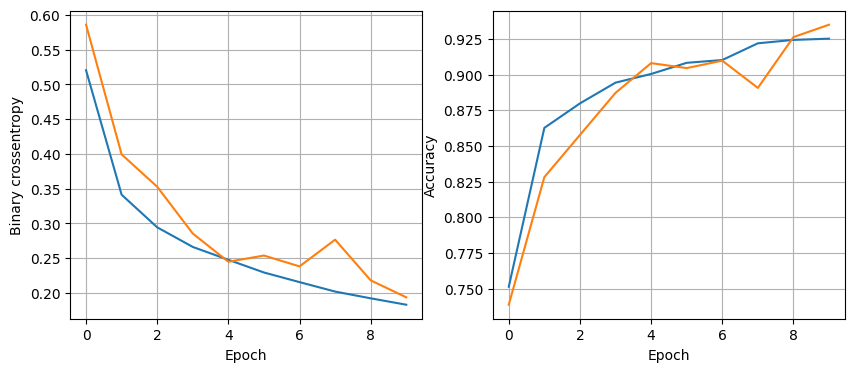

45/45 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.8839
32 nodes, dropout 0, lr 0.001, batch size 64


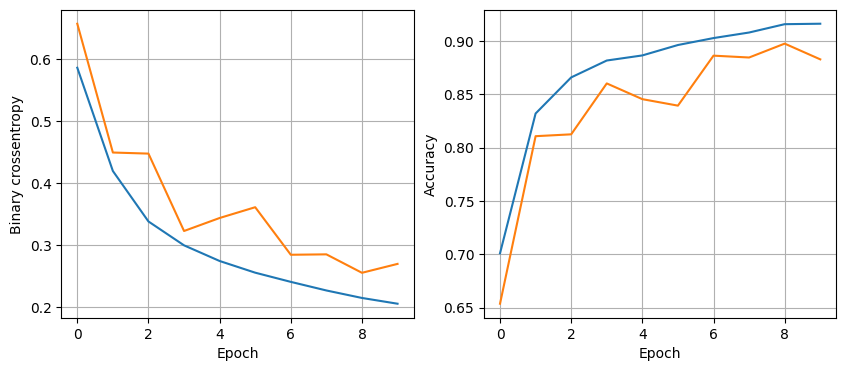

45/45 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.8860
32 nodes, dropout 0, lr 0.001, batch size 128


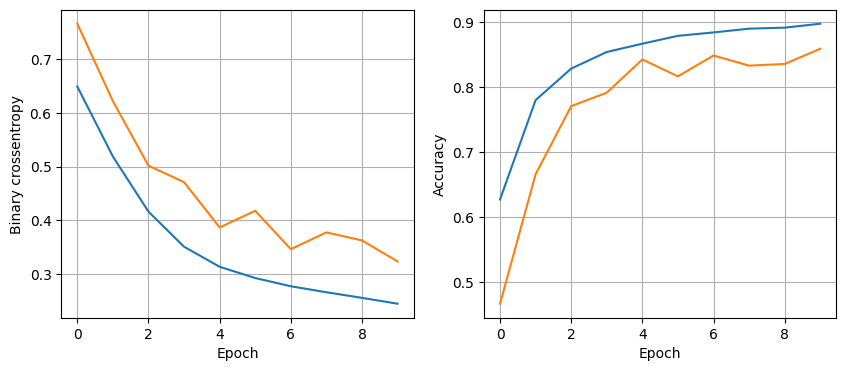

45/45 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.8690
32 nodes, dropout 0.2, lr 0.01, batch size 32


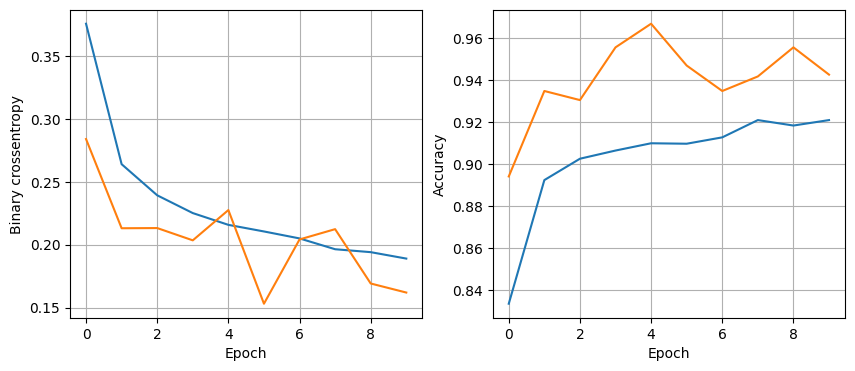

45/45 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.8980
32 nodes, dropout 0.2, lr 0.01, batch size 64


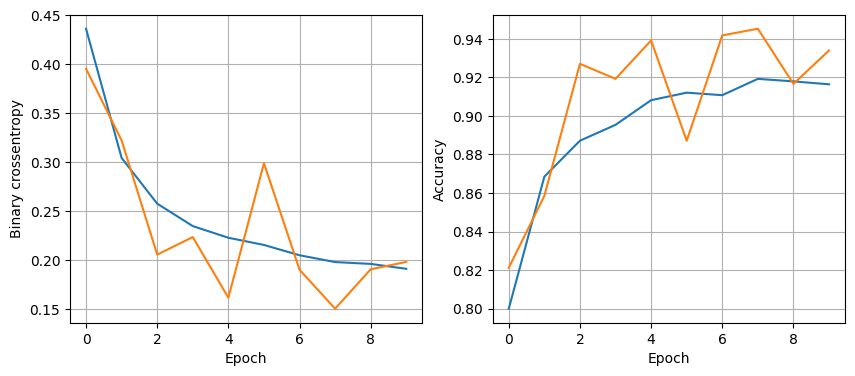

45/45 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9001
32 nodes, dropout 0.2, lr 0.01, batch size 128


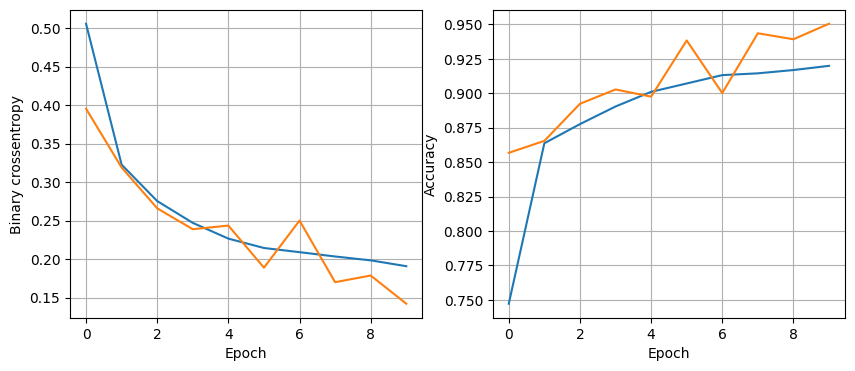

45/45 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9023
32 nodes, dropout 0.2, lr 0.005, batch size 32


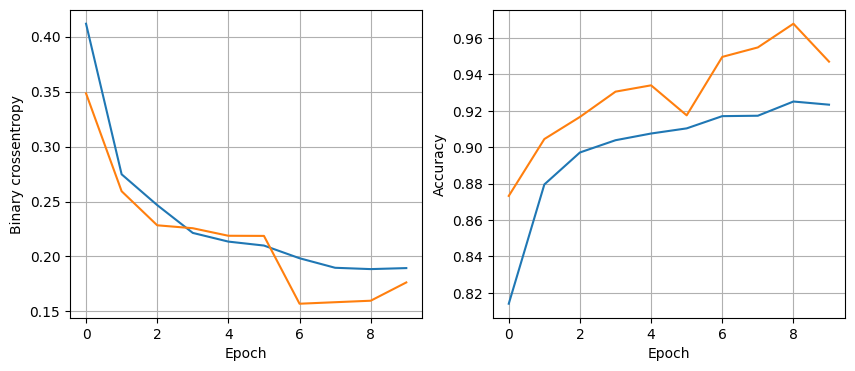

45/45 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9044
32 nodes, dropout 0.2, lr 0.005, batch size 64


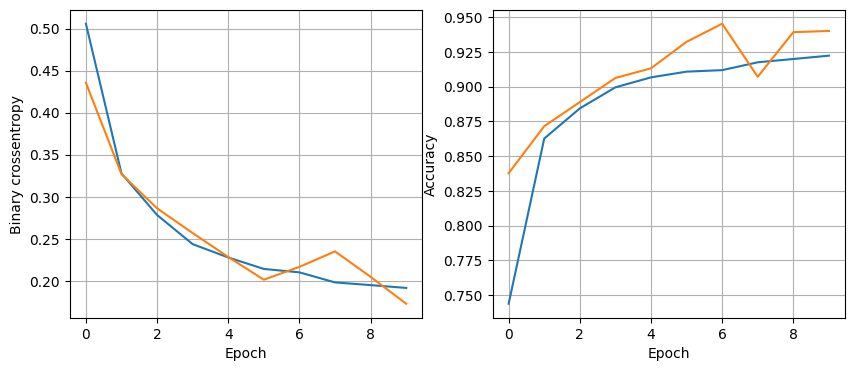

45/45 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.8966
32 nodes, dropout 0.2, lr 0.005, batch size 128


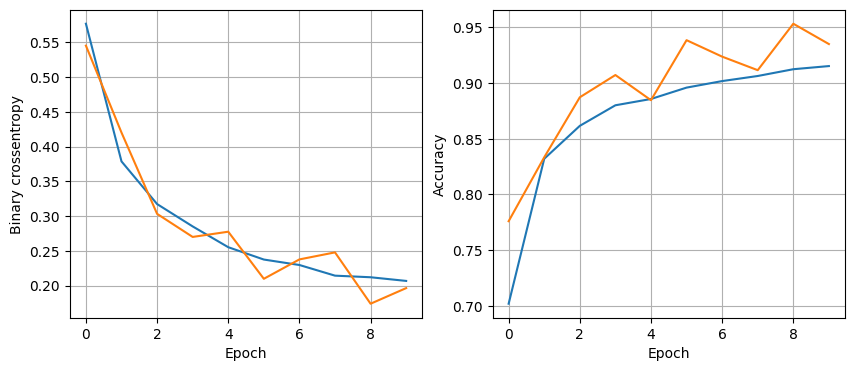

45/45 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.8938
32 nodes, dropout 0.2, lr 0.001, batch size 32


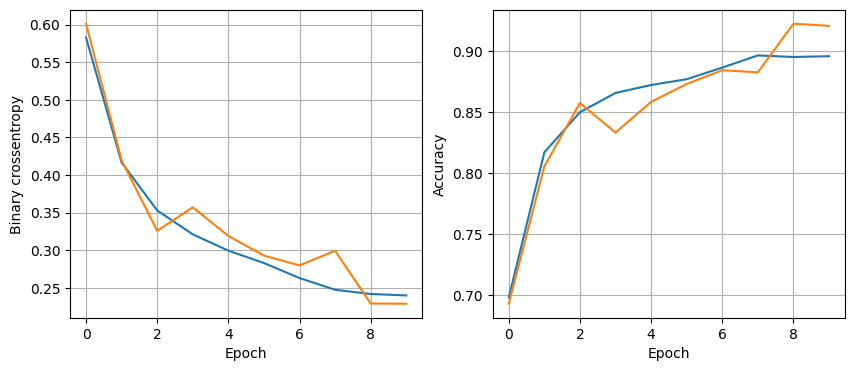

45/45 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.8924
32 nodes, dropout 0.2, lr 0.001, batch size 64


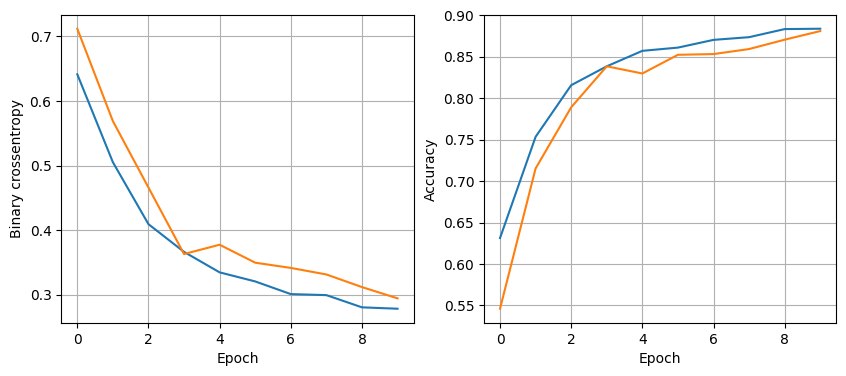

45/45 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.8831
32 nodes, dropout 0.2, lr 0.001, batch size 128


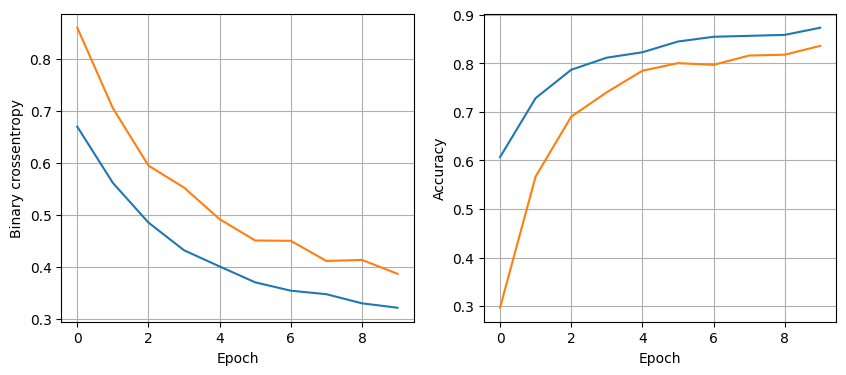

45/45 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8754
64 nodes, dropout 0, lr 0.01, batch size 32


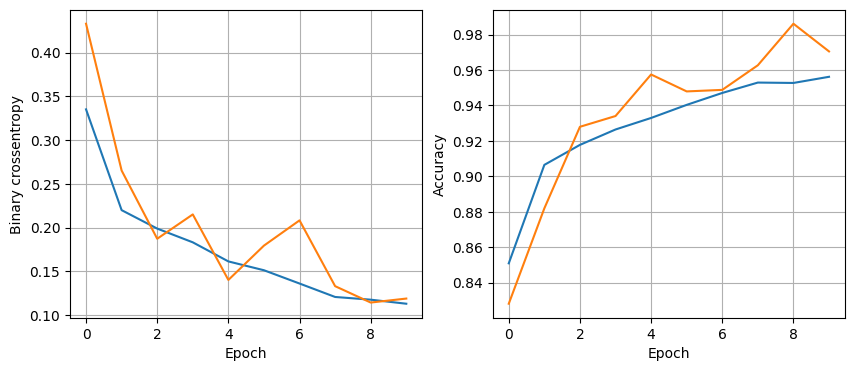

45/45 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8853
64 nodes, dropout 0, lr 0.01, batch size 64


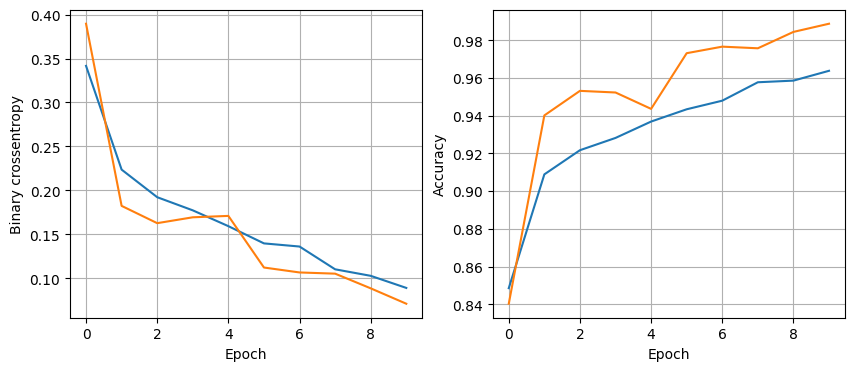

45/45 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8945
64 nodes, dropout 0, lr 0.01, batch size 128


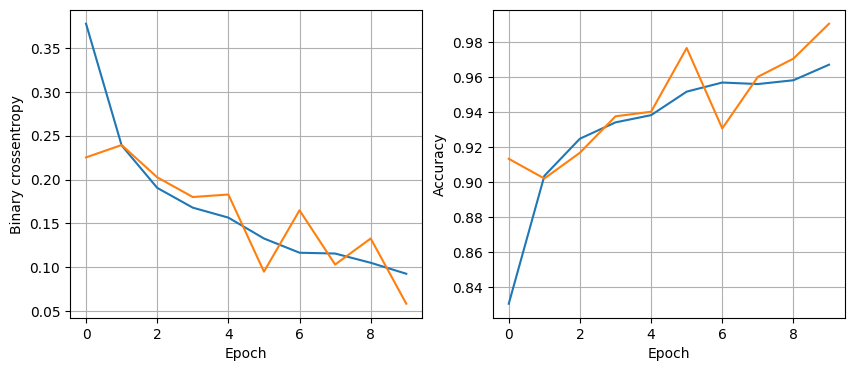

45/45 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8839
64 nodes, dropout 0, lr 0.005, batch size 32


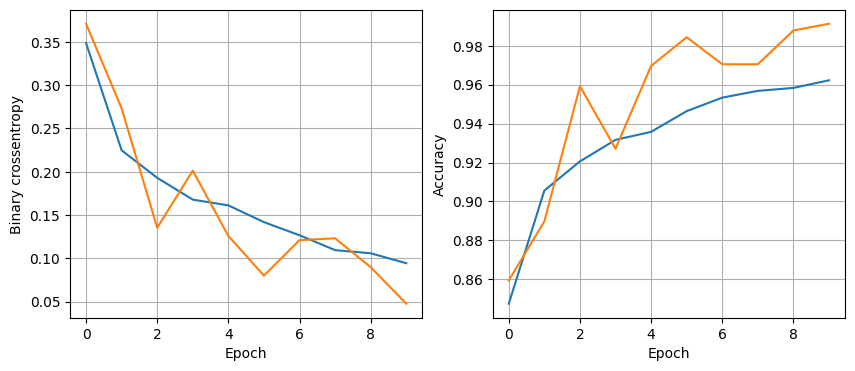

45/45 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8860
64 nodes, dropout 0, lr 0.005, batch size 64


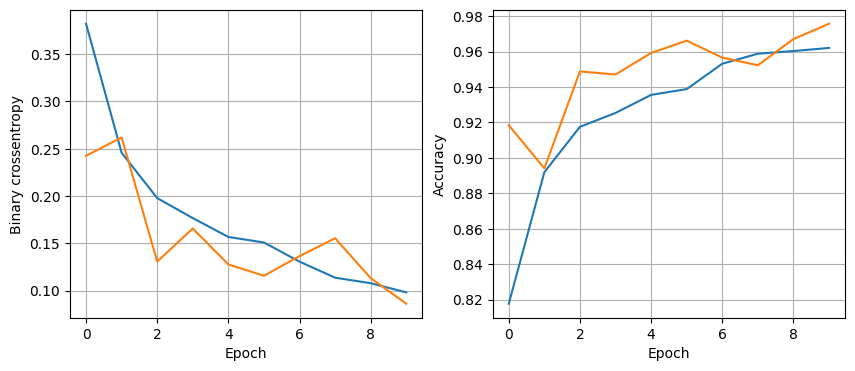

45/45 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8817
64 nodes, dropout 0, lr 0.005, batch size 128


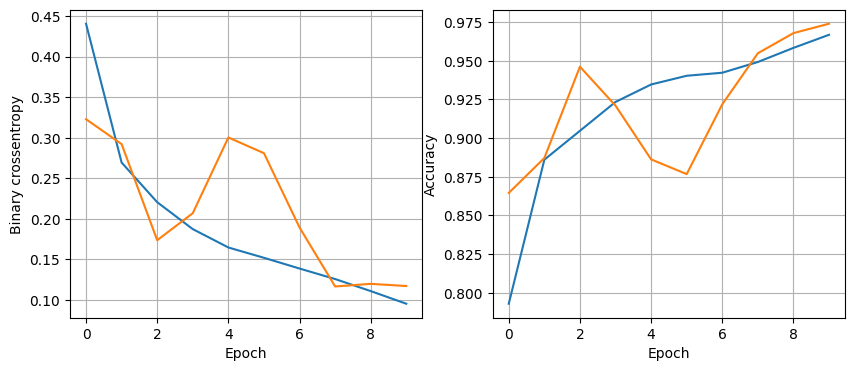

45/45 [==============================] - 0s 3ms/step - loss: 0.3014 - accuracy: 0.8817
64 nodes, dropout 0, lr 0.001, batch size 32


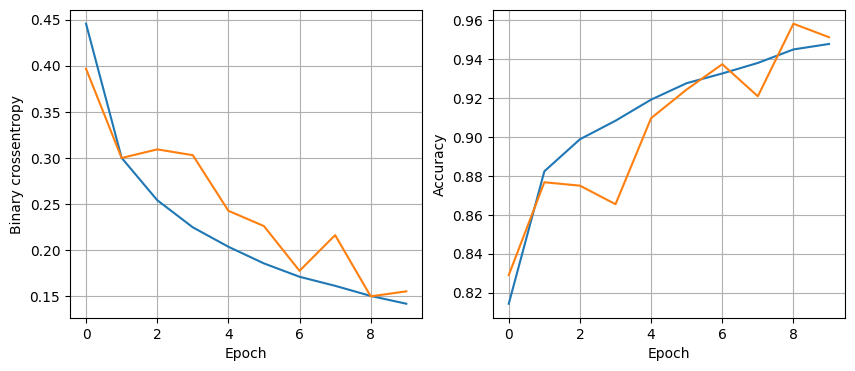

45/45 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.8938
64 nodes, dropout 0, lr 0.001, batch size 64


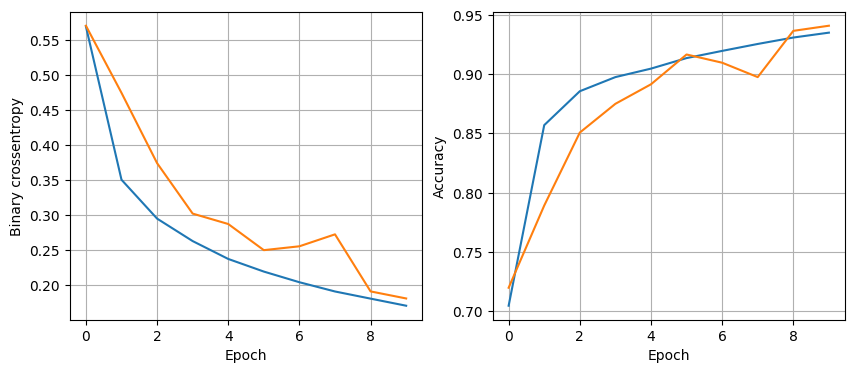

45/45 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.8931
64 nodes, dropout 0, lr 0.001, batch size 128


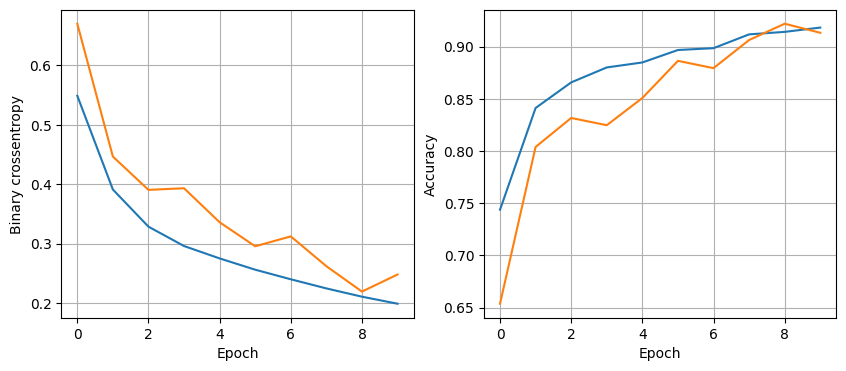

45/45 [==============================] - 0s 2ms/step - loss: 0.2674 - accuracy: 0.8789
64 nodes, dropout 0.2, lr 0.01, batch size 32


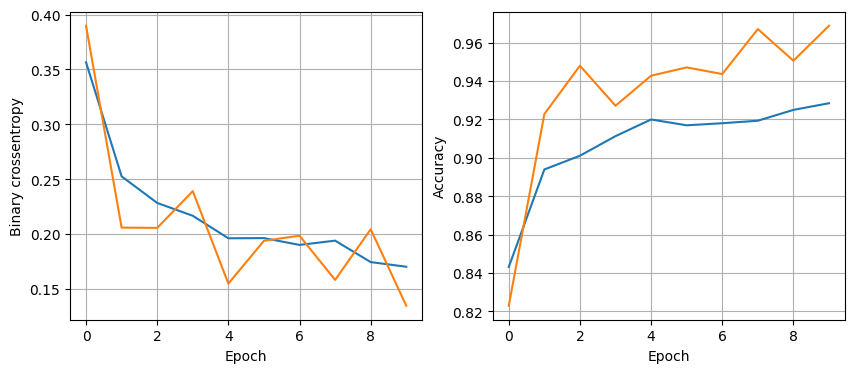

45/45 [==============================] - 0s 3ms/step - loss: 0.2549 - accuracy: 0.8945
64 nodes, dropout 0.2, lr 0.01, batch size 64


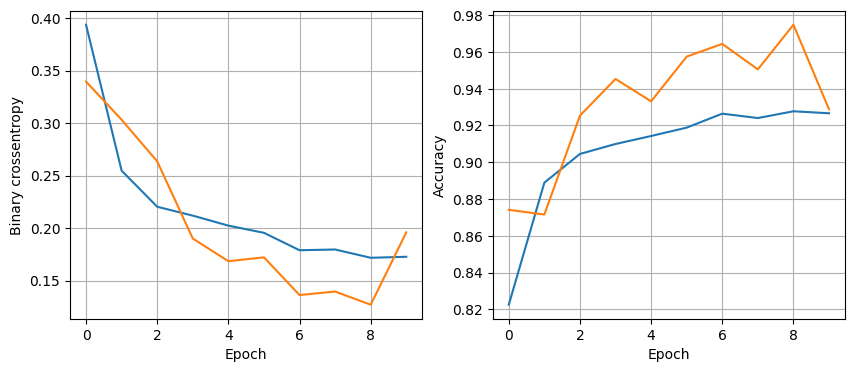

45/45 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.8909
64 nodes, dropout 0.2, lr 0.01, batch size 128


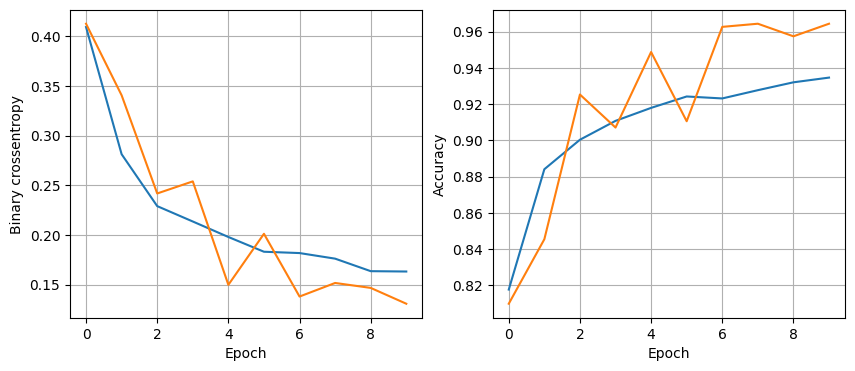

45/45 [==============================] - 0s 3ms/step - loss: 0.2414 - accuracy: 0.8980
64 nodes, dropout 0.2, lr 0.005, batch size 32


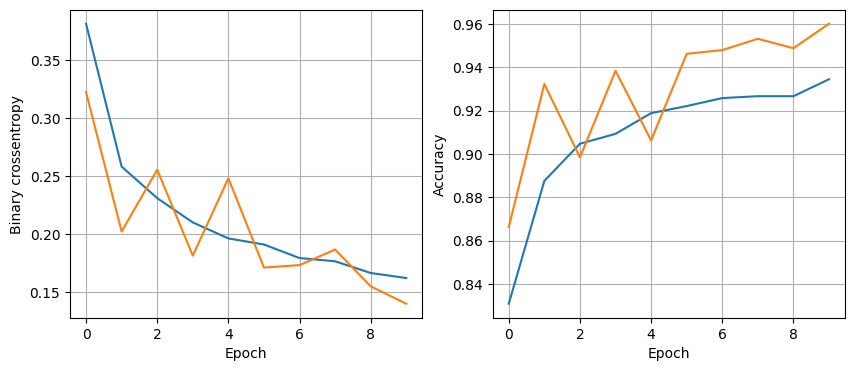

45/45 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.9008
64 nodes, dropout 0.2, lr 0.005, batch size 64


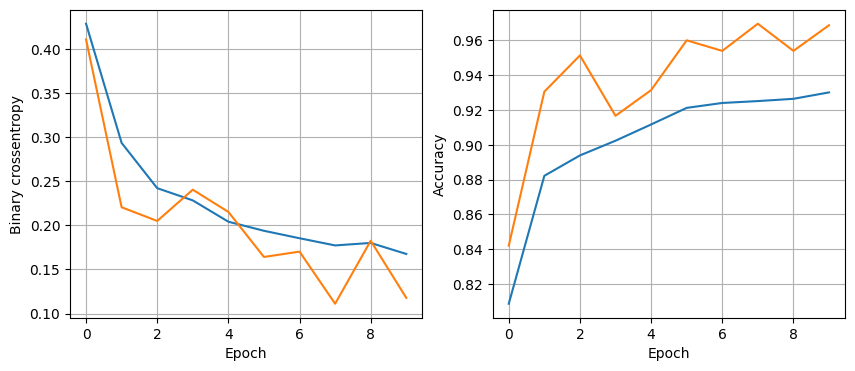

45/45 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.8973
64 nodes, dropout 0.2, lr 0.005, batch size 128


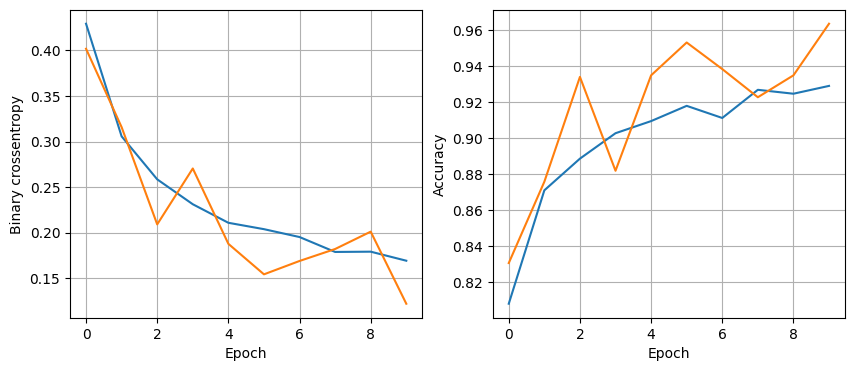

45/45 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9001
64 nodes, dropout 0.2, lr 0.001, batch size 32


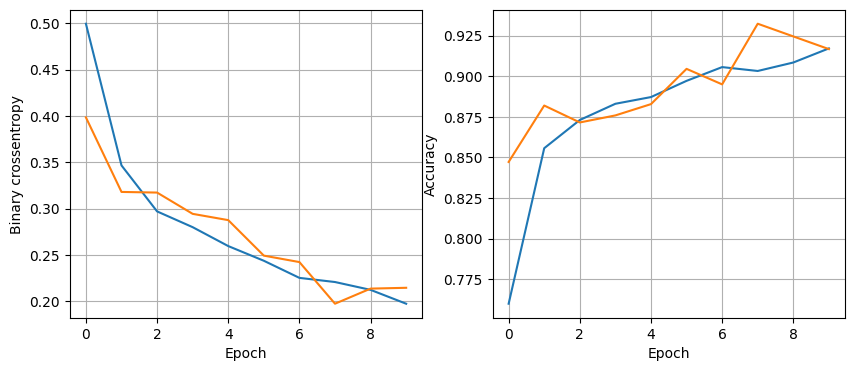

45/45 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.8902
64 nodes, dropout 0.2, lr 0.001, batch size 64


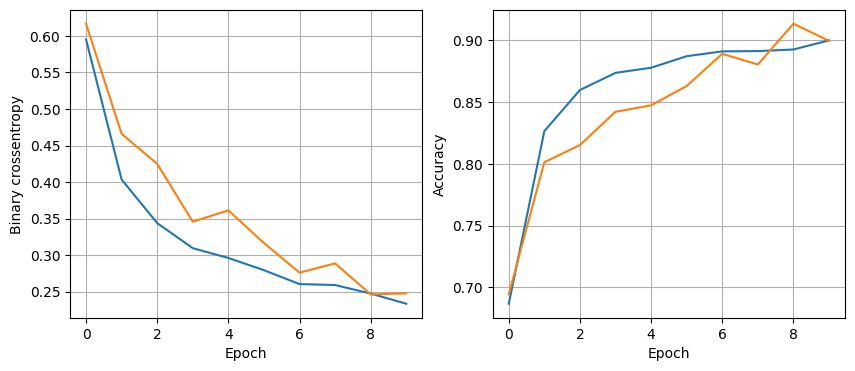

45/45 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8874
64 nodes, dropout 0.2, lr 0.001, batch size 128


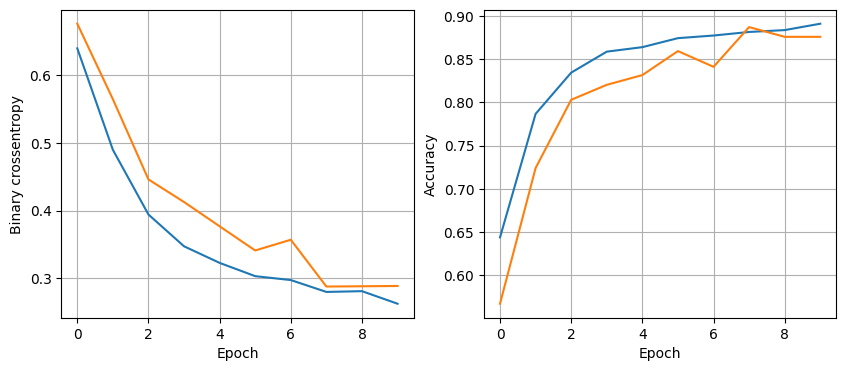

45/45 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8860


In [141]:
least_val_loss = float('inf')
least_loss_model = None
epochs=10
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [142]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

45/45 [==============================] - 0s 2ms/step


In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       488
         1.0       0.94      0.87      0.91       924

    accuracy                           0.88      1412
   macro avg       0.87      0.88      0.87      1412
weighted avg       0.89      0.88      0.88      1412

